In [1]:
import pandas as pd
import numpy as np

In [9]:
#read the logs
header = ['window_size','time_interval','epochs','latent_dim','score_window','threshold','f1','precision','recall']
df = pd.read_csv('hyperparam_logs/sleep/log_file_sleep.txt', header=None, names=header)
df=df.sort_values(by=['f1'],ascending=False)


In [10]:
#packages for plotting the charts
import matplotlib.pyplot as plt

In [11]:
#create arrays for the plots
f1_array = df['f1'].to_numpy()
precision_array = df['precision'].to_numpy()
recall_array = df['recall'].to_numpy()

#create the appropriate arrays
count = f1_array.size
index_array = np.arange(1,count+1,dtype=int)

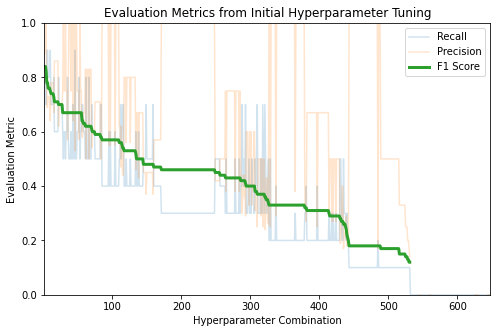

In [25]:
#plot the chart

#plot the recall and precision
plt.plot(index_array,recall_array,label="Recall",alpha=0.2)
plt.plot(index_array,precision_array,label="Precision",alpha=0.2)

#plot the f1 per day
plt.plot(index_array,f1_array,label="F1 Score",linewidth=3)

#axis ranges
plt.ylim([0, 1])
plt.xlim([1, count])

#output of hyperparameter tuning scores
plt.title('Evaluation Metrics from Initial Hyperparameter Tuning')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Evaluation Metric')


#add the legend
plt.legend(loc="upper right")

#set fig size
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig(f'report_outputs/hyperparameter_chart.jpg',dpi=200)
plt.show()


In [32]:
#distribution analysis
df = pd.read_csv('hyperparam_logs/sleep/hyper_param_distribution.txt', header=None, names=header)

#split into the relevant models
model_1 = df[:10].sort_values(by=['f1'],ascending=False)
model_2 = df[10:20].sort_values(by=['f1'],ascending=False)
model_3 = df[20:30].sort_values(by=['f1'],ascending=False)
model_4 = df[30:40].sort_values(by=['f1'],ascending=False)
model_5 = df[40:].sort_values(by=['f1'],ascending=False)
models = [model_1,model_2,model_3,model_4,model_5]

In [50]:
#summarise in datatable
model_averages = []
model_maxes = []
model_mins = []
model_stddevs = []
model_config = []
model_precision = []
model_recall = []

for model in models:
    model_averages.append(round(model['f1'].mean(),2))
    model_stddevs.append(round(model['f1'].std(),2))
    model_maxes.append(round(model['f1'].max(),2))
    model_mins.append(round(model['f1'].min(),2))
    model_recall.append(round(model['precision'].mean(),2))
    model_precision.append(round(model['recall'].mean(),2))
    model_config.append(f"{int(model['window_size'].mean())}/{int(model['time_interval'].mean())}/{int(model['epochs'].mean())}/{int(model['latent_dim'].mean())}/{int(model['score_window'].mean())}//{int(model['threshold'].mean())}")

#header columns
headers = ["model_config","f1_average","f1_stddev","f1_max","f1_min","recall","precision"]
df_list = zip(model_config,model_averages,model_stddevs,model_maxes,model_mins,model_recall,model_precision)
df_sum = pd.DataFrame(df_list,columns=headers)
print(df_sum)

#export it to a csv
df_sum.to_csv('report_outputs/distribution_analysis.csv')



          model_config  f1_average  f1_stddev  f1_max  f1_min  recall  \
0   200/1800/50/5/5//5        0.68       0.13    0.84    0.38    0.66   
1  100/1800/10/20/5//5        0.72       0.09    0.90    0.60    0.76   
2   400/300/10/5/50//5        0.62       0.16    0.89    0.35    0.70   
3  400/300/50/20/10//5        0.57       0.12    0.75    0.36    0.65   
4   100/1800/30/5/5//5        0.65       0.13    0.90    0.47    0.66   

   precision  
0       0.71  
1       0.70  
2       0.57  
3       0.51  
4       0.65  
